In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [2]:
movies = pd.DataFrame([
    {"movie_id": 1, "title": "Sabdham", "genre": "Horror Thriller", 
     "description": "A chilling horror thriller with gripping sound design."},
    {"movie_id": 2, "title": "Kudumbasthan", "genre": "Comedy Drama", 
     "description": "A family comedy drama filled with emotions and laughter."},
    {"movie_id": 3, "title": "Kadhalikka Neramillai", "genre": "Romantic Comedy", 
     "description": "A light-hearted romantic comedy released for Pongal."},
    {"movie_id": 4, "title": "Madraskaaran", "genre": "Drama", 
     "description": "A drama film set in Chennai, with music by AR Rahman."},
    {"movie_id": 5, "title": "Sweetheart!", "genre": "Romantic Comedy", 
     "description": "A sweet romantic comedy starring Rio Raj and Gopika Ramesh."},
    {"movie_id": 6, "title": "Dragon", "genre": "Comedy Drama", 
     "description": "A coming-of-age comedy drama with Pradeep Ranganathan."}
])

movies


,movie_id,title,genre,description
0,1,Sabdham,Horror Thriller,A chilling horror thriller with gripping sound...
1,2,Kudumbasthan,Comedy Drama,A family comedy drama filled with emotions and...
2,3,Kadhalikka Neramillai,Romantic Comedy,A light-hearted romantic comedy released for P...
3,4,Madraskaaran,Drama,"A drama film set in Chennai, with music by AR ..."
4,5,Sweetheart!,Romantic Comedy,A sweet romantic comedy starring Rio Raj and G...
5,6,Dragon,Comedy Drama,A coming-of-age comedy drama with Pradeep Rang...


In [3]:
movies["features"] = movies["genre"] + " " + movies["description"]

vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(movies["features"])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [4]:
def recommend_movie(title, top_n=3, show_chart=True):
    idx = movies[movies["title"].str.lower() == title.lower()].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    result = movies.iloc[movie_indices][["title", "genre", "description"]]

    if show_chart:
        # Prepare data for chart
        labels = movies.iloc[movie_indices]["title"].values
        scores = [s[1] for s in sim_scores]

        plt.figure(figsize=(6,4))
        plt.barh(labels, scores, color="skyblue")
        plt.xlabel("Similarity Score")
        plt.title(f"Movies similar to {title}")
        plt.gca().invert_yaxis()
        plt.show()

    return result


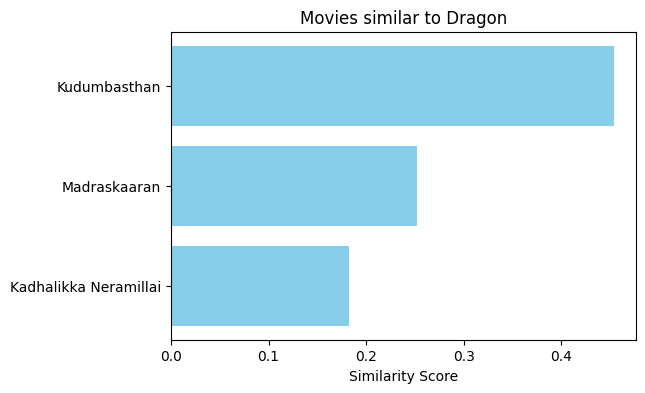

,title,genre,description
1,Kudumbasthan,Comedy Drama,A family comedy drama filled with emotions and...
3,Madraskaaran,Drama,"A drama film set in Chennai, with music by AR ..."
2,Kadhalikka Neramillai,Romantic Comedy,A light-hearted romantic comedy released for P...


In [5]:
recommend_movie("Dragon")


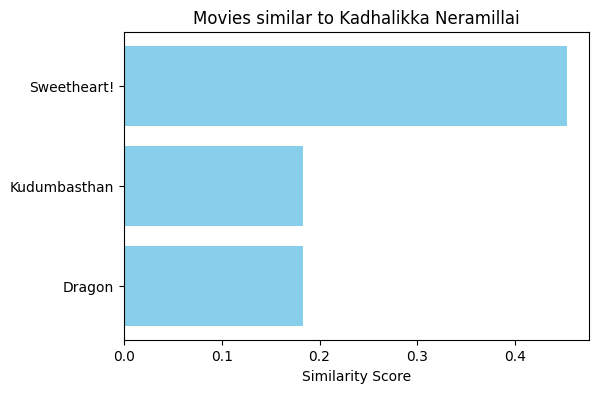

,title,genre,description
4,Sweetheart!,Romantic Comedy,A sweet romantic comedy starring Rio Raj and G...
1,Kudumbasthan,Comedy Drama,A family comedy drama filled with emotions and...
5,Dragon,Comedy Drama,A coming-of-age comedy drama with Pradeep Rang...


In [6]:
recommend_movie("Kadhalikka Neramillai")